# Markov Chains

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- The Markov chain will hop around on a discrete state space which is made up from three weather states:

In [13]:
state_space = ("sunny", "cloudy", "rainy")

- In a discrete state space, the transition operator is just a matrix. Columns and rows correspond, in our case, to sunny, cloudy, and rainy weather. We pick more or less sensible values for all transition probabilities:



In [14]:
transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))

In [15]:
n_steps = 20000
states = [0]

for i in range(n_steps):
    states.append(np.random.choice((0, 1, 2), p=transition_matrix[states[-1]]))

states = np.array(states)

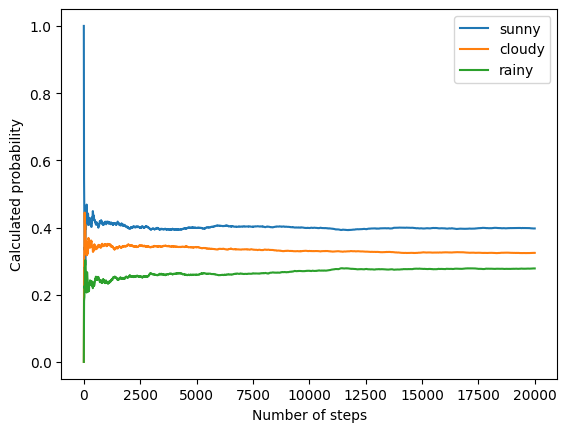

In [26]:
fig, ax = plt.subplots()
width = 1000
offsets = range(1, n_steps, 5)

for i, label in enumerate(state_space):
    p_offest=[np.sum(states[:offset] == i) / offset for offset in offsets]
    ax.plot(offsets, p_offest, label=label)

ax.set_xlabel("Number of steps")
ax.set_ylabel("Calculated probability")
plt.legend()

### Example of detailed balance: Isomerisation reaction

- To illustrate the approach to equilibrium in a reversible A ↔ B reaction using a Markov chain model, let's consider the following scenario and Python simulation:

**Scenario Setup**
In this chemical interconversion reaction:

- $A \rightarrow B$ with probability $p$
- $B \rightarrow A$ with probability $q$

**Markov Chain Model**

- The system has two states (A, B), with transitions defined by a transition matrix.
- Simulate Transitions: The simulation determines the system's state after each step by following the transition probabilities.
- Calculate Equilibrium: We observe how the system's state probabilities evolve over $N$ steps to reach equilibrium.


In [ ]:
impot numpy as np
# Transition probabilities
p = 0.3  # Probability of going from A to B
q = 0.7  # Probability of going from B to A

# Transition matrix
transition_matrix = np.array([
    [1-p, p],  # From A to A, B
    [q, 1-q]   # From B to A, B
])

# Initial state (0 for A, 1 for B)
current_state = 0

# Number of steps to simulate
n_steps = 1000

# Record the state at each step to visualize the approach to equilibrium
state_history = np.zeros((n_steps, 2))  # Create a history record for both states A and B
state_history[0, current_state] = 1

# Simulate the Markov chain
for step in range(1, n_steps):
    current_state = np.random.choice([0, 1], p=transition_matrix[current_state])
    state_history[step, current_state] = 1

# Calculate cumulative probabilities over time to show how probabilities stabilize
cumulative_probabilities = np.cumsum(state_history, axis=0) / np.arange(1, n_steps+1).reshape(-1, 1)

In [ ]:
# Plotting the results
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(cumulative_probabilities[:, 0], label='Probability of A', color='blue')
ax1.plot(cumulative_probabilities[:, 1], label='Probability of B', color='red')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Probability')
ax1.set_title('Approach to Equilibrium Probabilities of States A and B')
ax1.legend()
ax1.grid(True)


# Plotting the results
ax2.bar(['A', 'B'], [state_record[0]/n_steps, state_record[1]/n_steps], color=['blue', 'red'])
ax2.set_ylabel('Probability')
ax2.set_title('Equilibrium probabilities of states A and B')
fig.tight_layout()


- As the number of steps increases, the fraction of time the system spends in each state $A$ and $B$ should converge to the theoretical equilibrium probabilities. These are derived from the detailed balance conditions $p \cdot \pi_A = q \cdot \pi_B$ and the normalization condition $\pi_A + \pi_B = 1$.
- This simulation visually demonstrates the concept of reaching equilibrium in a reversible reaction through a Markov process, which is essential in understanding statistical thermodynamics.